## lab 2 
Разработка программы построения морфологического скелета изображения и восстановления изображения по морфологическому скелету для бинарных изображений и различных структурирующих элементов.

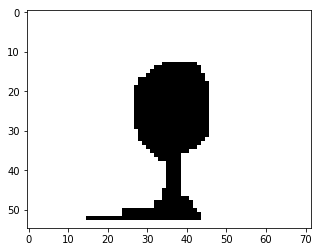

In [736]:
from skimage.util import img_as_ubyte
from skimage import io
from skimage.morphology import erosion, dilation
from PIL import Image

import numpy as np



Image.open("i3.jpg").convert('1').save('i3.png')
binaryImage = img_as_ubyte(io.imread("i3.png", as_binary = True))


plt.imshow(binaryImage, cmap=cm.binary)
plt.show()

In [617]:

square = np.array(
       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=np.uint8)


cross = np.array(
        [[0, 0, 1, 0, 0],
         [0, 0, 1, 0, 0],
         [1, 1, 1, 1, 1],
         [0, 0, 1, 0, 0],
         [0, 0, 1, 0, 0]
        ], dtype=np.uint8
)

diamond = np.array(
       [[0, 1, 0],
        [1, 1, 1],
        [0, 1, 0]], dtype=np.uint8)

In [536]:


def isEmpty(array):
    for i in range(0, len(array)):
        for j in range(0, len(array[i])):
            if array[i][j] == 255:
                return False
    return True

def substract(a, b):
    c = np.empty((len(a), len(a[0])))
    for i in range(0, len(a)):
        for j in range(0, len(a[i])):
            c[i][j] = a[i][j] - b[i][j]
    return c

def add(a, b):
    for i in range(0, len(a)):
        for j in range(0, len(a[i])):
            if b[i][j] == 255:
                a[i][j] = 255

## Построение скелета

In [737]:
def get_skeleton_set(ans, n, image, element):
    n = 0
    while True:
        ans.append(np.empty((len(binaryImage), len(binaryImage[0]))))
        erosed = erosion(image, element)
        if isEmpty(erosed):
            ans[n] = image
            break
        else:
            dilated = dilation(erosed, element)
            ans[n] = substract(image, dilated)
            n += 1
            image = erosed
        
def build_skeleton(image, element, element_name, show_proc = False):
    skeleton = []
    get_skeleton_set(skeleton, 0, image, element)
    if show_proc:
        plot_process(skeleton)
    plot_diff(image, skeleton, element_name )
    return skeleton

## Восстановление изображения

In [723]:
def reconstruction(reconstr, element, skeleton, n):
    add(reconstr, skeleton[n])
    if n == 0:
        return reconstr
    else:
        reconstr = dilation(reconstr, element)
        return reconstruction(reconstr, element, skeleton, n - 1)
    
def build_reconstruction(skeleton, element,element_name):
    reconstr = np.empty((len(binaryImage), len(binaryImage[0])))
    plot_reconstruction(
        skeleton, 
        reconstruction(reconstr, element, skeleton, len(skeleton) - 1), 
        element_name
    )

In [724]:
import matplotlib.pyplot as plt

def plot_process(skeleton):
    result = np.empty((len(binaryImage), len(binaryImage[0])))
    result.fill(0)
    i = 0
    for sklt in skeleton:
        add(result, sklt)
        _, ax = plt.subplots(ncols = 1, figsize = (5, 3), sharex = True, sharey = True)
        drawSubplot(ax, sklt, 'skeleton '+ str(i))
        i += 1
           
def plot_diff(origin, skeleton, structuredElementName):
    result = np.empty((len(binaryImage), len(binaryImage[0])))
    result.fill(0)
    for sklt in skeleton:
        add(result, sklt)   
    compare(origin, result, "skeletonize with " + structuredElementName)
    
    
    
def plot_reconstruction(skeleton, reconstructioned, structuredElementName):
    result = np.empty((len(binaryImage), len(binaryImage[0])))
    result.fill(0)
    for sklt in skeleton:
        add(result, sklt)
    compare(result, reconstructioned, "reconstructioned by " + structuredElementName)

def compare(origin, filtered, filterName):
    _, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 6), sharex = True, sharey = True)
    drawSubplot(ax1, origin, 'origin')
    drawSubplot(ax2, filtered, filterName)
    
def drawSubplot(ax, image, text):
    ax.imshow(image, plt.cm.gray)
    ax.set_title(text)
    ax.axis('off')

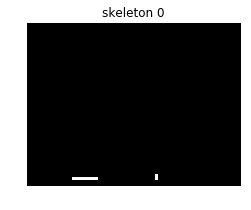

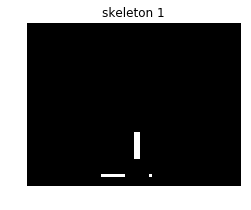

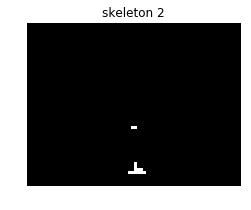

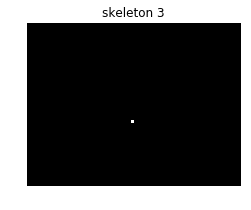

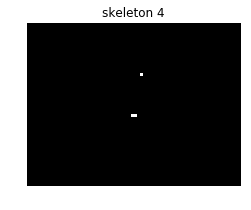

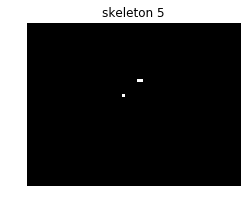

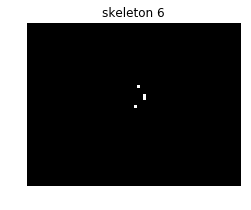

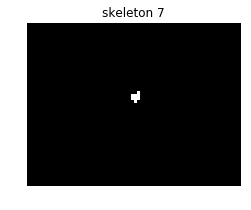

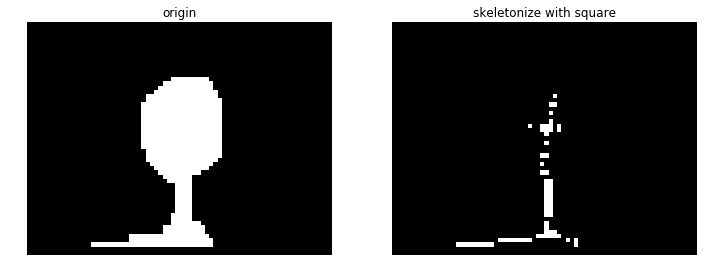

In [730]:
skeleton1 = build_skeleton(binaryImage, square, "square", show_proc = True)

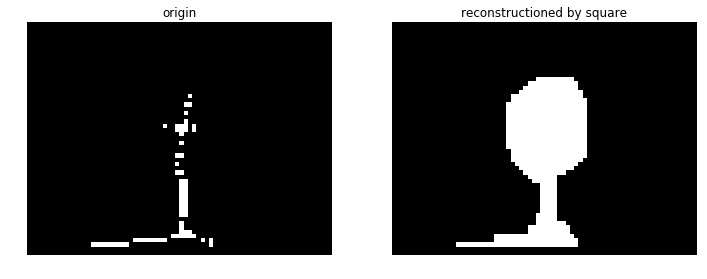

In [726]:
build_reconstruction(skeleton1, square, "square")

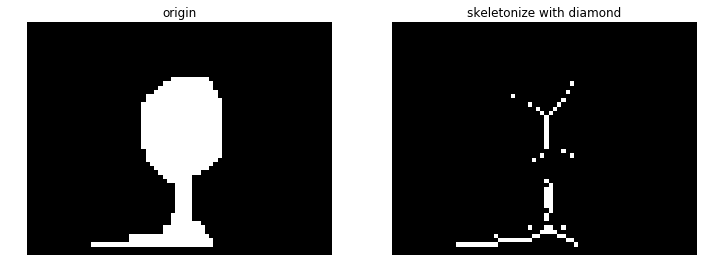

In [727]:
skeleton2 = build_skeleton(binaryImage, diamond, "diamond")

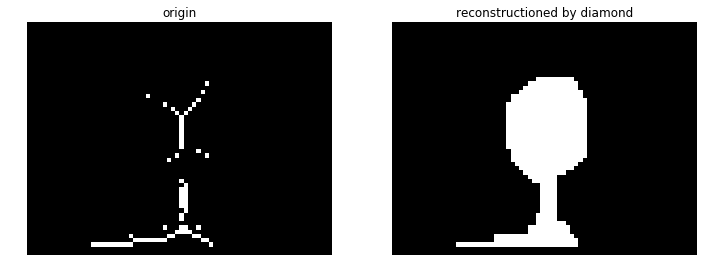

In [728]:
build_reconstruction(skeleton2, diamond, "diamond")

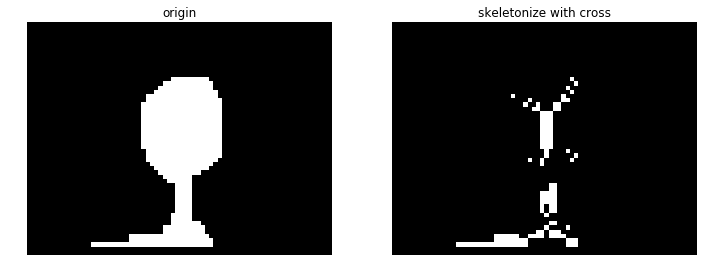

In [734]:
skeleton3 = build_skeleton(binaryImage, cross, "cross")


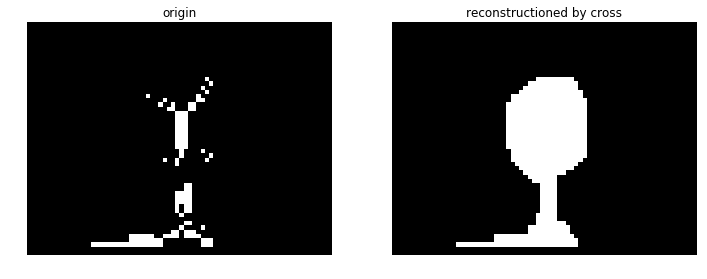

In [735]:
build_reconstruction(skeleton3, cross, "cross")

## Используя skimage

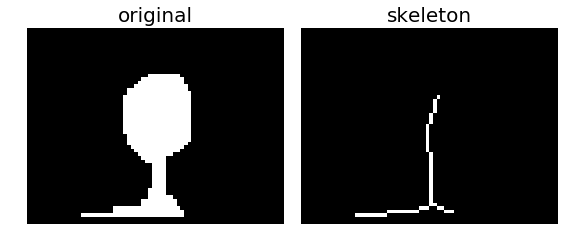

In [544]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

# Invert the horse image
image = binaryImage > 0

# perform skeletonization
skeleton = skeletonize(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()